In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn is a package for statistical data visualization
import seaborn as sns; sns.set()

In [3]:
df = pd.read_csv('wdbc.csv', header=None)


In [4]:
df.shape

(569, 32)

In [5]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.dtypes

0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object

In [17]:
df[1].value_counts()

1
B    357
M    212
Name: count, dtype: int64

In [18]:
X = df.values[:,2:].astype(float) # no nos interesa el identificador asi ni la etiqueta
y = (df.values[:,1]=='B').astype(int) #guardamos la etiqueta en y
target_names = np.array([('malign'),('benign')],dtype='U10') #los guardamos como el nombre completo en un array de 2x1
target_names[y][:10] #vemos si funciona

array(['malign', 'malign', 'malign', 'malign', 'malign', 'malign',
       'malign', 'malign', 'malign', 'malign'], dtype='<U10')

In [27]:
print(f"number of malign cases = {(target_names[y]=="malign").sum()}")
print(f"number of benign cases = {(target_names[y]=="benign").sum()}")

number of malign cases = 212
number of benign cases = 357


En algún momento tenemos que hacer histogramas, pero se utilizan para datos unidimensionales (en el 001 lo hace solo con una columna) y el problema es que tenemos muchas columnas. Se me ha ocurrido hacerlo con un PCA de una dimensión, pero no sé si daría mucha información. Hay que darle una pensada.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) #creamos el objeto pca con 4 componentes
X_r = pca.fit(X).transform(X) #ajustamos el modelo y transformamos los datos
print(X.shape) #vemos la forma de los datos originales
print(X_r.shape) #vemos la forma de los datos transformados

print(f'explained variance ratio (first two components): {pca.explained_variance_ratio_}')

(569, 30)
(569, 4)
explained variance ratio (first two components): [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04]


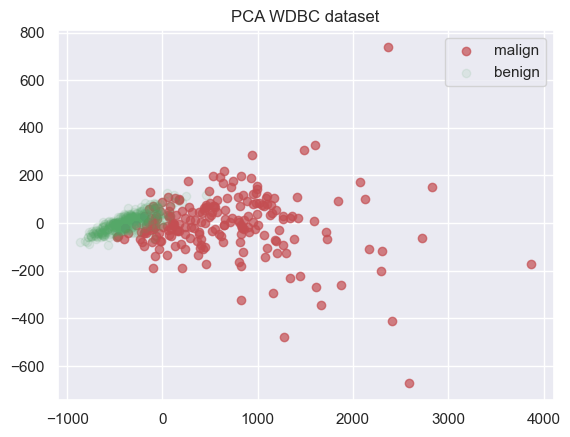

In [22]:
plt.figure()
comp1=0; #first component to visualize, you can modify it
comp2=1; #second component to visualize, you can modify it

# plot the two components selected above for both malign and benign tumors
plt.scatter(X_r[y == 0, comp1], X_r[y == 0, comp2], color='r', alpha=.7, lw=1,
                label='malign')

plt.scatter(X_r[y == 1, comp1], X_r[y == 1, comp2], color='g', alpha=.1, lw=1,
                label='benign')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA WDBC dataset')


plt.show()